In [239]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


data

In [211]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [212]:
df.shape

(284807, 31)

In [213]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [215]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


 75% or more of the classes column are = 0 which is something tricky

In [216]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

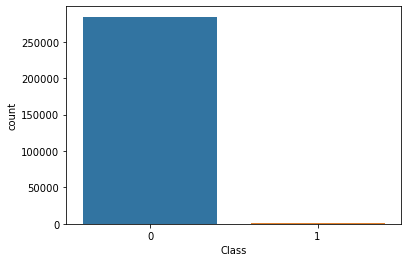

In [217]:
sns.countplot(x='Class', data=df);

In [218]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Data is Highly Unbalanced

In [219]:
df.columns[df.isna().any()]

Index([], dtype='object')

C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


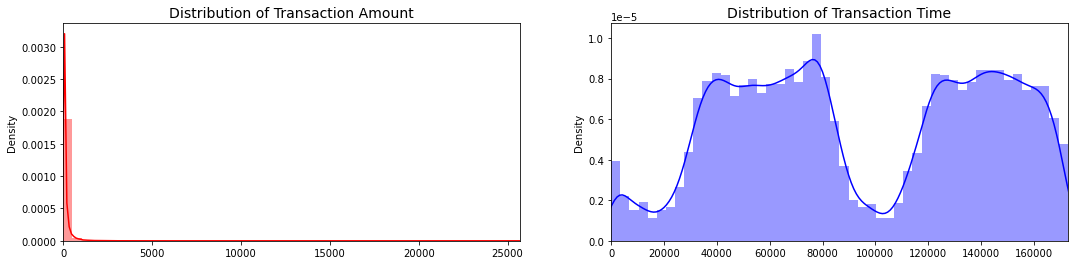

In [220]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Build a sample dataset containing similar distribution of normal transactions 


getting a non_fraud sample that equals to the fraud one to make the data balanced

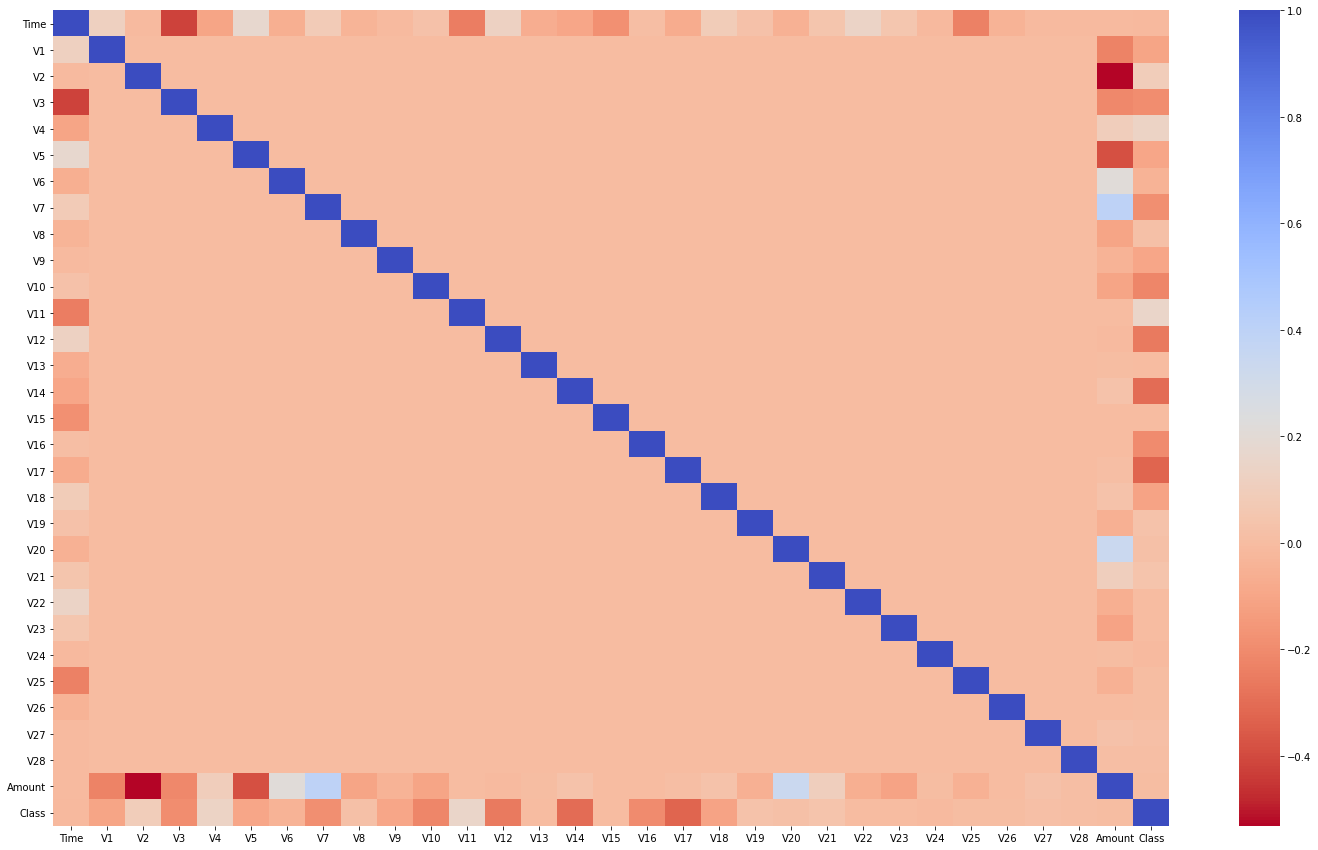

In [229]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot_kws={'size':20});

In [221]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [222]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [223]:
legit_sample = legit.sample(492)

In [224]:
legit_sample.count()[0]

492

In [225]:
balanced_df = pd.concat([legit_sample, fraud], axis=0)
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
111497,72247.0,1.056603,0.140700,-0.173992,2.052635,0.586941,0.756186,0.158118,0.135133,-0.845379,...,-0.200276,-0.954626,-0.219556,-1.445521,0.476258,-0.118508,-0.043351,0.015760,114.10,0
66415,52041.0,-3.011150,1.111914,0.263396,-1.278942,-0.882279,0.808485,-0.628385,1.225177,1.266395,...,-0.300345,-0.528775,-0.455446,-1.245420,-0.044906,0.781625,-1.152931,-0.789498,83.10,0
59486,48863.0,-7.375755,-7.789651,0.645019,1.216230,3.267716,-3.517842,-2.718187,-0.329144,2.106266,...,-0.654667,-0.266831,-3.145831,0.929030,-1.761930,0.560439,0.187017,-0.789467,38.09,0
162010,114739.0,-1.382621,-0.066435,1.853080,-1.419355,0.684770,-0.213705,-0.074847,0.344935,0.283257,...,0.273578,0.526623,-0.364601,0.696916,0.597875,0.072438,-0.182787,0.162768,4.36,0
11484,19900.0,1.076846,0.236400,1.093598,1.343999,-0.400543,0.116316,-0.442079,0.077441,1.162917,...,0.083058,0.536160,-0.040560,0.183902,0.379083,-0.333195,0.031404,0.018037,20.00,0


In [230]:
balanced_df.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

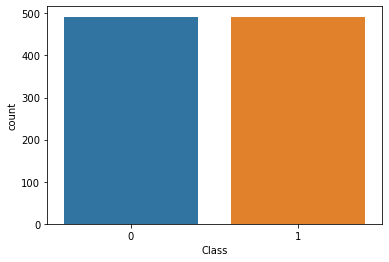

In [231]:
sns.countplot(x='Class', data=balanced_df);

now we have equal number of legal and fraud that's how we convert our data from un-balanced to balanced data

In [232]:
balanced_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92506.103659,0.001409,0.084682,0.052434,0.101997,0.047303,0.012200,0.023779,0.040693,0.021728,...,-0.035486,-0.003113,0.047633,0.005732,-0.007963,-0.009204,-0.013936,-0.016139,-0.000973,75.373882
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


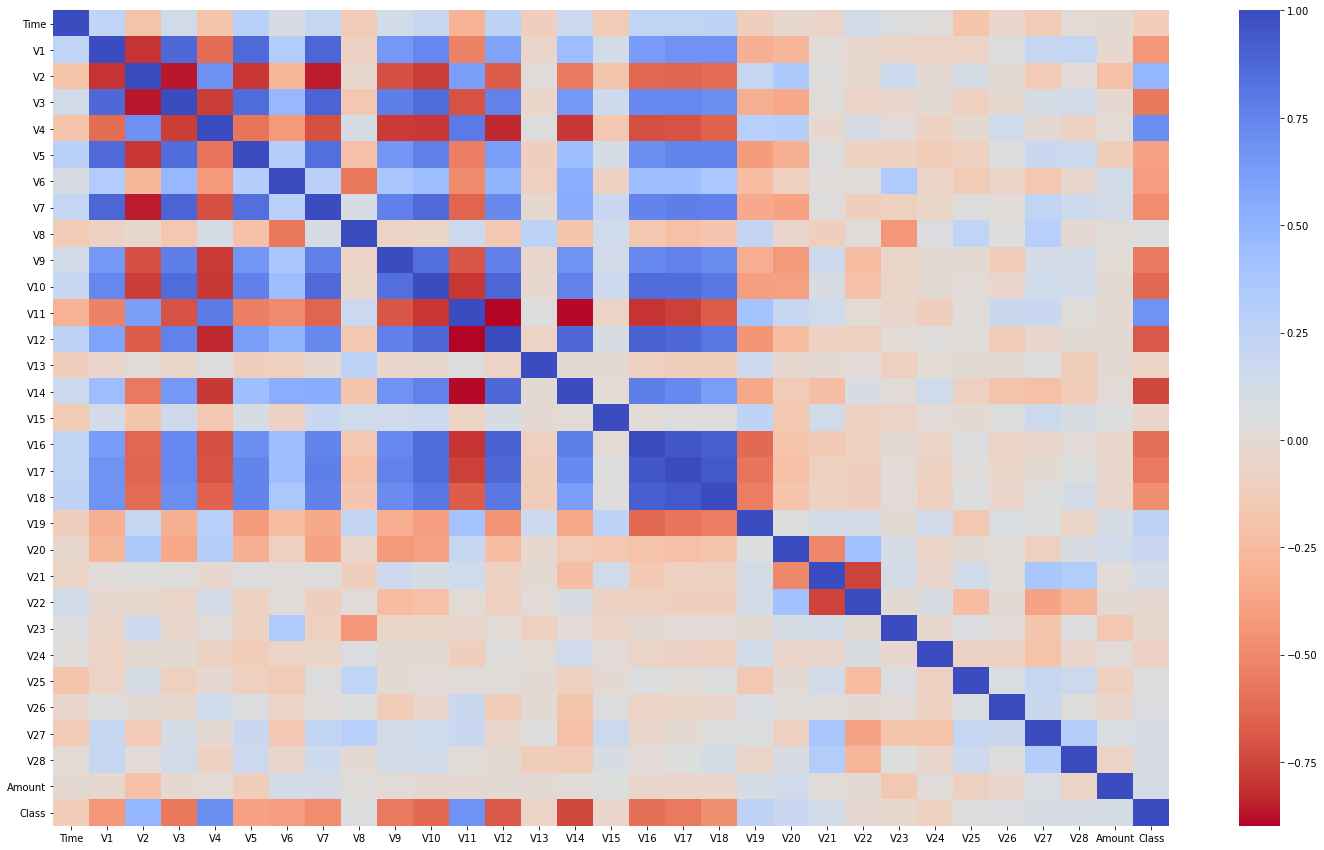

In [234]:
plt.figure(figsize=(25,15))
sns.heatmap(balanced_df.corr(), cmap='coolwarm_r', annot_kws={'size':20});

look at the diffrence correlation between imbalanced df and balanced df<br>
Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)<br>
Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

V17, V14, V12, V10 are negative correlated to Class let's visualize those features
V2, V4, V19, V11 are Positive correlated to Class let's visualize those features

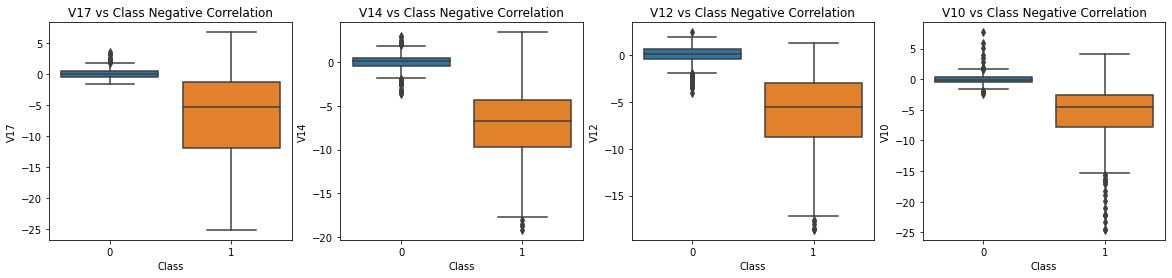

In [236]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=balanced_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=balanced_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=balanced_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=balanced_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

it seems those V's when they are netagive values it is Fraud transaction

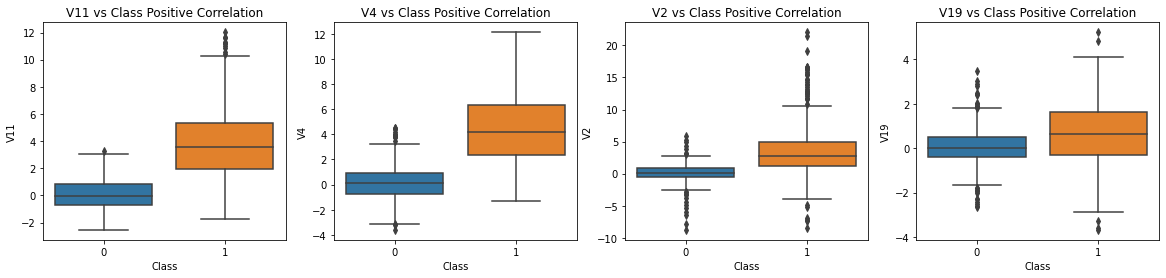

In [238]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=balanced_df, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=balanced_df, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=balanced_df, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=balanced_df, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

it seems those V's when they are highly Postive values it is Fraud transaction

In [45]:
X = balanced_df.drop('Class', axis=1)
y = balanced_df.Class

In [149]:
std_scaler = StandardScaler()
balanced_df['scaled_amount'] = std_scaler.fit_transform(balanced_df['Amount'].values.reshape(-1,1))
balanced_df['scaled_time'] = std_scaler.fit_transform(balanced_df['Time'].values.reshape(-1,1))

In [150]:
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
30106,35773.0,-0.485474,1.582300,0.078269,1.312236,0.379121,-0.544598,0.344590,0.273350,-0.662899,...,-0.149381,-0.163358,-0.023815,-0.227233,-0.078616,-0.174914,1.00,0,-0.443176,-1.073054
39789,39967.0,-0.043832,0.955729,0.452063,0.084942,0.495858,-0.053522,0.767434,-0.221509,-0.640049,...,-0.281480,-0.914603,-0.328889,1.252152,-0.058163,0.110049,24.00,0,-0.342611,-0.986185
196227,131414.0,-0.618440,1.624813,-0.823550,0.290094,1.299432,-0.202120,1.952718,-0.333888,-0.914519,...,-0.337773,0.606397,0.087965,-0.649090,-0.168793,0.176110,97.29,0,-0.022156,0.907913
187024,127353.0,2.102411,-0.343170,-1.688030,-0.194441,0.577140,0.342284,-0.173170,0.028978,0.966345,...,-0.078268,-0.352550,0.339601,0.212050,-0.036253,-0.077888,1.00,0,-0.443176,0.823799
168222,119122.0,-0.201683,1.016838,0.193175,-0.631275,0.384146,-1.160702,0.992105,-0.202411,0.137228,...,0.074416,0.038753,-0.437604,0.142470,0.359580,0.155728,4.86,0,-0.426299,0.653315


In [152]:
balanced_df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [153]:
X_scale = balanced_df.drop('Class', axis=1)
y = balanced_df.Class

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25, random_state=200)

In [208]:
model = RandomForestClassifier(n_estimators=120)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [209]:
model.score(X_test, y_test)

0.967479674796748